# Pré-processamento

In [37]:
# encoding: utf-8
# encoding: iso-8859-1
# encoding: win-1252

import pandas as pd
import csv
from datetime import datetime
from dateutil import parser
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt # Matplot is a common Python lib for plotting
%matplotlib inline
import seaborn as sns # Seaborn is a great tool for data analysis graphs
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


### Dataset com Emoji

In [97]:
### Com emoji
datasetInFrame = pd.read_csv("output-pleasure-arousal-labeled-emoji.csv", sep="|",quoting=csv.QUOTE_ALL)

### Dataset sem Emoji

In [98]:
### Sem emoji
#datasetInFrame = pd.read_csv("output-pleasure-arousal-labeled.csv", sep="|", encoding="ISO-8859-1",quoting=csv.QUOTE_ALL)

In [99]:
#datasetInFrame.describe()
datasetInFrame.head()

,id,txt,val,int,cit,data,dia
0,line_fdl,"Tô tão pensativa ultimamente, nn tô me sentind...",3,3,"Rio de Janeiro, Brasil",10/27/2017 0:17:49,6
1,line_fdl,Guilherme só aparece aqui em casa p fazer barb...,5,4,"Rio de Janeiro, Brasil",10/26/2017 20:47:35,5
2,line_fdl,Amo cheiro de café pela manhã.. ☕💛,5,4,"Rio de Janeiro, Brasil",10/26/2017 9:45:33,5
3,line_fdl,Tô meio aérea,4,2,"Rio de Janeiro, Brasil",10/26/2017 1:24:55,5
4,line_fdl,"Tô mega cansada nn sei que cançaso é esse, só ...",2,4,"Rio de Janeiro, Brasil",10/26/2017 0:56:21,5


## Verificando a distribuição das Classes:
Intensidade: 1 a 7
Valência: 1 a 7

In [100]:
totalIntensityClasses = {}

for i in range(1,8):
    totalIntensityClasses[i] = datasetInFrame[datasetInFrame.int == i]["txt"].count()
totalIntensityClasses

{1: 129, 2: 218, 3: 243, 4: 273, 5: 229, 6: 156, 7: 70}

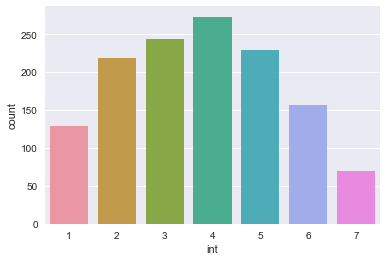

In [101]:
sns.countplot(x='int', data=datasetInFrame)

In [102]:
totalValencyClasses = {}

for i in range(1,8):
    totalValencyClasses[i] = datasetInFrame[datasetInFrame.val == i]["txt"].count()
totalValencyClasses

{1: 49, 2: 189, 3: 316, 4: 225, 5: 413, 6: 106, 7: 20}

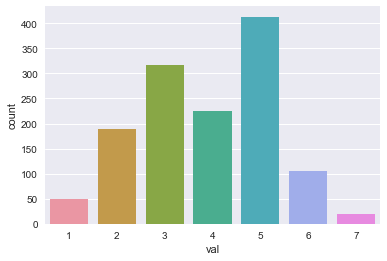

In [103]:
sns.countplot(x='val', data=datasetInFrame)

## Separando data e hora

In [104]:
dateTime = datasetInFrame["data"].apply(lambda  x: x.split(' '))
date = dateTime.apply(lambda x: x[0])
time = dateTime.apply(lambda x: x[1])
datasetInFrame["date"] = date
datasetInFrame["time"] = time
del datasetInFrame["data"]
datasetInFrame.head()


,id,txt,val,int,cit,dia,date,time
0,line_fdl,"Tô tão pensativa ultimamente, nn tô me sentind...",3,3,"Rio de Janeiro, Brasil",6,10/27/2017,0:17:49
1,line_fdl,Guilherme só aparece aqui em casa p fazer barb...,5,4,"Rio de Janeiro, Brasil",5,10/26/2017,20:47:35
2,line_fdl,Amo cheiro de café pela manhã.. ☕💛,5,4,"Rio de Janeiro, Brasil",5,10/26/2017,9:45:33
3,line_fdl,Tô meio aérea,4,2,"Rio de Janeiro, Brasil",5,10/26/2017,1:24:55
4,line_fdl,"Tô mega cansada nn sei que cançaso é esse, só ...",2,4,"Rio de Janeiro, Brasil",5,10/26/2017,0:56:21


## Substituindo Valores Para Cidade
1. Removendo o País;
2. Substituindo: 
    * Rio de Janeiro = 1 
    * São Paulo = 2

In [105]:
city = datasetInFrame["cit"].apply(lambda x: x.split(','))
datasetInFrame["cit"] = city.apply(lambda x: x[0])
datasetInFrame.head()

,id,txt,val,int,cit,dia,date,time
0,line_fdl,"Tô tão pensativa ultimamente, nn tô me sentind...",3,3,Rio de Janeiro,6,10/27/2017,0:17:49
1,line_fdl,Guilherme só aparece aqui em casa p fazer barb...,5,4,Rio de Janeiro,5,10/26/2017,20:47:35
2,line_fdl,Amo cheiro de café pela manhã.. ☕💛,5,4,Rio de Janeiro,5,10/26/2017,9:45:33
3,line_fdl,Tô meio aérea,4,2,Rio de Janeiro,5,10/26/2017,1:24:55
4,line_fdl,"Tô mega cansada nn sei que cançaso é esse, só ...",2,4,Rio de Janeiro,5,10/26/2017,0:56:21


In [106]:
#datasetInFrame["cit"] = datasetInFrame["cit"].apply(lambda x: 1 if x == "Rio de Janeiro" else 2)
#datasetInFrame

## Criando *features*
1. isWeekend? [dia 6 após às 19:00, dia 7  e  1 até 19:00 sim 0 não
2. isMad? 1 sim 0 não

In [107]:
def isWeekend(day,hour):
    format = '%H:%M:%S'
    hour = datetime.strptime(hour, format)
    limitWeekend = datetime.strptime("19:00:00", format)
    if (day == 6) and (hour >= limitWeekend):
        return 1
    elif (day == 1) and (hour < limitWeekend):
        return 1
    elif day == 7:
        return 1
    else:
        return 0

datasetInFrame['isWeekend'] = pd.Series(np.zeros(len(datasetInFrame)), index=datasetInFrame.index)

for index, row in datasetInFrame.iterrows():
    datasetInFrame.loc[index,"isWeekend"] = isWeekend(row["dia"],row["time"])
datasetInFrame.head()

,id,txt,val,int,cit,dia,date,time,isWeekend
0,line_fdl,"Tô tão pensativa ultimamente, nn tô me sentind...",3,3,Rio de Janeiro,6,10/27/2017,0:17:49,0.0
1,line_fdl,Guilherme só aparece aqui em casa p fazer barb...,5,4,Rio de Janeiro,5,10/26/2017,20:47:35,0.0
2,line_fdl,Amo cheiro de café pela manhã.. ☕💛,5,4,Rio de Janeiro,5,10/26/2017,9:45:33,0.0
3,line_fdl,Tô meio aérea,4,2,Rio de Janeiro,5,10/26/2017,1:24:55,0.0
4,line_fdl,"Tô mega cansada nn sei que cançaso é esse, só ...",2,4,Rio de Janeiro,5,10/26/2017,0:56:21,0.0


In [108]:
def isMad(hour):
    format = '%H:%M:%S'
    hour = datetime.strptime(hour, format)
    initLimit = datetime.strptime("23:00:00", format)
    endLimit = datetime.strptime("05:00:00", format)
    
    if (hour >= initLimit) or (hour < endLimit):
        return 1
    else:
        return 0

    
datasetInFrame['isMad'] = pd.Series(np.zeros(len(datasetInFrame)), index=datasetInFrame.index)

for index, row in datasetInFrame.iterrows():
    datasetInFrame.loc[index,"isMad"] = isMad(row["time"])
datasetInFrame.head()

,id,txt,val,int,cit,dia,date,time,isWeekend,isMad
0,line_fdl,"Tô tão pensativa ultimamente, nn tô me sentind...",3,3,Rio de Janeiro,6,10/27/2017,0:17:49,0.0,1.0
1,line_fdl,Guilherme só aparece aqui em casa p fazer barb...,5,4,Rio de Janeiro,5,10/26/2017,20:47:35,0.0,0.0
2,line_fdl,Amo cheiro de café pela manhã.. ☕💛,5,4,Rio de Janeiro,5,10/26/2017,9:45:33,0.0,0.0
3,line_fdl,Tô meio aérea,4,2,Rio de Janeiro,5,10/26/2017,1:24:55,0.0,1.0
4,line_fdl,"Tô mega cansada nn sei que cançaso é esse, só ...",2,4,Rio de Janeiro,5,10/26/2017,0:56:21,0.0,1.0


## Histogramas do Dataset

### Valência entre Final de Semana (1.0) e Dia de Semana (0.0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA2825518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA28DD2E8>], dtype=object)

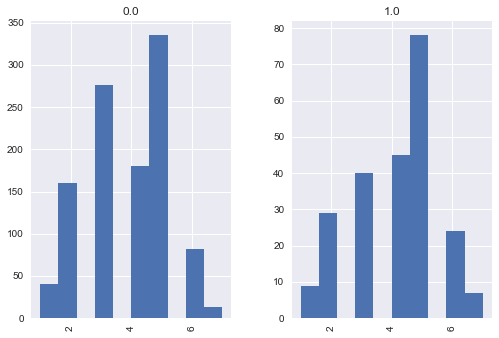

In [14]:
#Valência em Fim de Semana
datasetInFrame.hist(column='val',by='isWeekend', bins=10)

### Valência na Madrugada (1.0) e Não (0.0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA29B0A20>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA2A33EB8>], dtype=object)

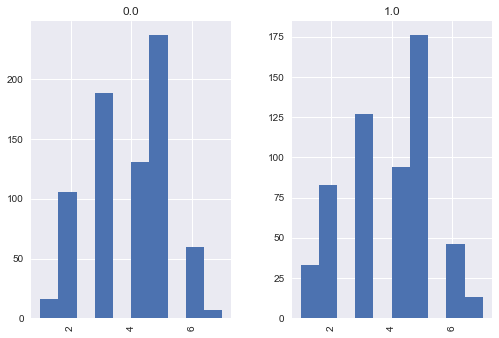

In [15]:
#Valência na Madrugada
datasetInFrame.hist(column='val',by='isMad', bins=10)

### Valência por Cidade

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA2AF7550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA2B950B8>], dtype=object)

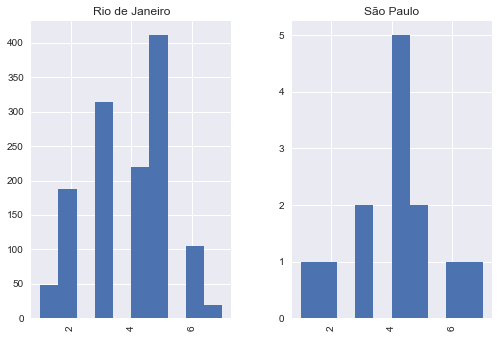

In [16]:
#Valência por Cidade
datasetInFrame.hist(column='val',by='cit', bins=10)

### Valência por Intensidade

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA2C700B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA2FB48D0>]], dtype=object)

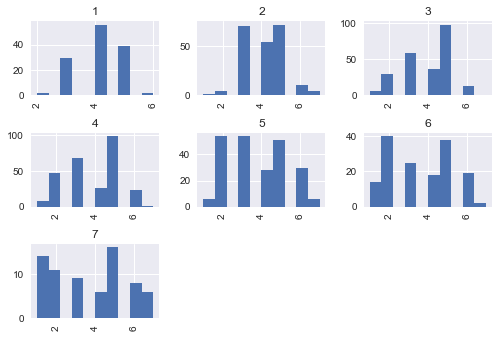

In [17]:
#Valência por Intensidade
datasetInFrame.hist(column='val',by='int', bins=10)

### Valência por Dia

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA31F02B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000009AA35F2F60>]], dtype=object)

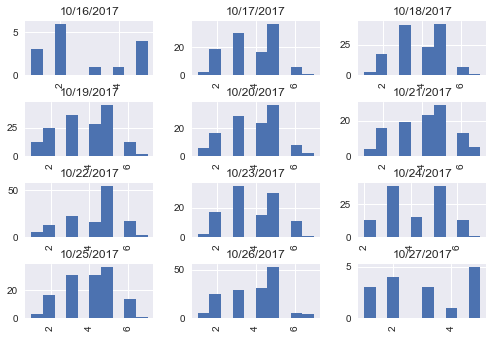

In [18]:
datasetInFrame.hist(column='val',by='date', bins=10)

## Removendo colunas

Colunas removidas: date, time, cit e int

In [72]:
### Usuários
users = []
for i in datasetInFrame['id'].unique():
    users.append(i)

## Balanceando os dados

In [109]:
balancedDataset = pd.DataFrame()
limitSamples = 100
for i in datasetInFrame['val'].unique():
    balancedDataset = balancedDataset.append(datasetInFrame[datasetInFrame['val'] == i].iloc[:limitSamples],ignore_index=True)
    
balancedDataset.head()

,id,txt,val,int,cit,dia,date,time,isWeekend,isMad
0,line_fdl,"Tô tão pensativa ultimamente, nn tô me sentind...",3,3,Rio de Janeiro,6,10/27/2017,0:17:49,0.0,1.0
1,line_fdl,Joana fez eu me arrumar atoa affff cr,3,5,Rio de Janeiro,4,10/25/2017,0:45:39,0.0,1.0
2,line_fdl,Tô tão sem paciência sem.or,3,5,Rio de Janeiro,6,10/20/2017,23:25:23,1.0,1.0
3,line_fdl,Até gosto de calor mas tá de mais mds scrr,3,4,Rio de Janeiro,5,10/19/2017,22:36:52,0.0,0.0
4,line_fdl,Tô com uma dorzinha d cabeça q ta me dx enjoad...,3,4,Rio de Janeiro,4,10/18/2017,22:33:22,0.0,0.0


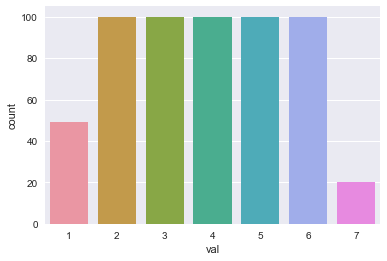

In [110]:
sns.countplot(x='val', data=balancedDataset)

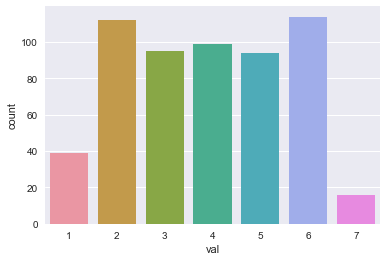

In [111]:
#Seleciona aleatóriamente
dataset = balancedDataset.sample(len(balancedDataset), replace=True)
sns.countplot(x='val', data=dataset)

In [112]:
dataset.head()

,id,txt,val,int,cit,dia,date,time,isWeekend,isMad
223,FabricioGemada,Cheguei em casa agora,4,1,Rio de Janeiro,6,10/20/2017,23:15:21,1.0,1.0
250,sabrina_bazeth,No ttk nig sobrevive com pouco 🎶,4,2,Rio de Janeiro,1,10/22/2017,18:17:10,1.0,0.0
183,sabrina_bazeth,So esse brigadeiro msm da melhor forma 😍😍,5,4,Rio de Janeiro,5,10/26/2017,3:38:41,0.0,1.0
198,sabrina_bazeth,"Nao ame, faça amor ✌",5,3,Rio de Janeiro,2,10/23/2017,17:04:25,0.0,0.0
237,FabricioGemada,Será que a bibi atirou? 🤔,4,6,Rio de Janeiro,4,10/18/2017,23:40:01,0.0,1.0


## Separando o Dataset

In [113]:
for i in dataset['val'].unique():
    x= datasetInFrame[datasetInFrame['val'] == i]
    print(len(x))

225
413
49
189
106
316
20


## Adicionando *features* de texto
1. Bag of words

## Removendo caracteres especiais

In [114]:
sentences = [str(sentence).lower().replace("'","").replace(".","").replace(",","").replace('"',"").replace("?","") for sentence in dataset["txt"]]
dataset["txt"] = sentences
dataset.head()

,id,txt,val,int,cit,dia,date,time,isWeekend,isMad
223,FabricioGemada,cheguei em casa agora,4,1,Rio de Janeiro,6,10/20/2017,23:15:21,1.0,1.0
250,sabrina_bazeth,no ttk nig sobrevive com pouco 🎶,4,2,Rio de Janeiro,1,10/22/2017,18:17:10,1.0,0.0
183,sabrina_bazeth,so esse brigadeiro msm da melhor forma 😍😍,5,4,Rio de Janeiro,5,10/26/2017,3:38:41,0.0,1.0
198,sabrina_bazeth,nao ame faça amor ✌,5,3,Rio de Janeiro,2,10/23/2017,17:04:25,0.0,0.0
237,FabricioGemada,será que a bibi atirou 🤔,4,6,Rio de Janeiro,4,10/18/2017,23:40:01,0.0,1.0


## Tokenizing

In [115]:
sentencesWithTokens = [nltk.word_tokenize(sentence.lower()) for sentence in dataset["txt"]]
dataset["txt"] = sentencesWithTokens
dataset.head()

,id,txt,val,int,cit,dia,date,time,isWeekend,isMad
223,FabricioGemada,"[cheguei, em, casa, agora]",4,1,Rio de Janeiro,6,10/20/2017,23:15:21,1.0,1.0
250,sabrina_bazeth,"[no, ttk, nig, sobrevive, com, pouco, 🎶]",4,2,Rio de Janeiro,1,10/22/2017,18:17:10,1.0,0.0
183,sabrina_bazeth,"[so, esse, brigadeiro, msm, da, melhor, forma,...",5,4,Rio de Janeiro,5,10/26/2017,3:38:41,0.0,1.0
198,sabrina_bazeth,"[nao, ame, faça, amor, ✌]",5,3,Rio de Janeiro,2,10/23/2017,17:04:25,0.0,0.0
237,FabricioGemada,"[será, que, a, bibi, atirou, 🤔]",4,6,Rio de Janeiro,4,10/18/2017,23:40:01,0.0,1.0


## Removendo StopWords
E Removendo espaços

In [116]:
stops = set(stopwords.words("portuguese"))
#words = ' '.join([w for w in words if not w in stops])

sentencesWithoutStopWords = []
for i,row in dataset.iterrows():
    sentence =  ' '.join([w for w in row["txt"] if not w in stops])
#    for word in row["txt"]:
#        if not word in stop_words:
#            sentence = sentence + " "+ str(word)
    sentencesWithoutStopWords.append(sentence.strip())
dataset["txt"]=sentencesWithoutStopWords
dataset.head()

,id,txt,val,int,cit,dia,date,time,isWeekend,isMad
223,FabricioGemada,cheguei casa agora,4,1,Rio de Janeiro,6,10/20/2017,23:15:21,1.0,1.0
250,sabrina_bazeth,ttk nig sobrevive pouco 🎶,4,2,Rio de Janeiro,1,10/22/2017,18:17:10,1.0,0.0
183,sabrina_bazeth,so brigadeiro msm melhor forma 😍😍,5,4,Rio de Janeiro,5,10/26/2017,3:38:41,0.0,1.0
198,sabrina_bazeth,nao ame faça amor ✌,5,3,Rio de Janeiro,2,10/23/2017,17:04:25,0.0,0.0
237,FabricioGemada,bibi atirou 🤔,4,6,Rio de Janeiro,4,10/18/2017,23:40:01,0.0,1.0


## Bag of Words

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(token_pattern=r"(?u)\b[a-zA-Z]\w+\b",lowercase=True, ngram_range=(1, 2))


datasetTrain = count_vect.fit_transform(dataset["txt"])

from pprint import pprint
pprint(count_vect.vocabulary_)

{'aaaaaaaaa': 0,
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaa': 1,
 'aaaahh': 2,
 'aaaai': 3,
 'abençoado': 4,
 'abençoe': 5,
 'abençoe todos': 6,
 'acaba': 7,
 'acaba perdendo': 8,
 'acabei': 9,
 'acabei almoça': 10,
 'acabei almoçar': 11,
 'acabei amassar': 12,
 'acabei assistir': 13,
 'acabei corta': 14,
 'acabei vim': 15,
 'acabouuuuu': 16,
 'aceitar': 17,
 'aceitar tudo': 18,
 'acha': 19,
 'acha tô': 20,
 'acho': 21,
 'acho ano': 22,
 'acho ja': 23,
 'acho vi': 24,
 'acho vou': 25,
 'acompanhe': 26,
 'acontecem': 27,
 'acontecem td': 28,
 'acontecendo': 29,
 'acontecendo vida': 30,
 'acontecer': 31,
 'acordado': 32,
 'acordado bunda': 33,
 'acordar': 34,
 'acordar cedo': 35,
 'acorde': 36,
 'acordei': 37,
 'acordei cedo': 38,
 'acordei mal': 39,
 'acordo': 40,
 'acordo todos': 41,
 'acredita': 42,
 'acredita vendo': 43,
 'acredito': 44,
 'acredito caralho': 45,
 'adoooroo': 46,
 'adoooroo traz': 47,
 'adora': 48,
 'adora cena': 49,
 'adorei': 50,
 'adorei kkkkk': 51,
 'adorei kkkkkk': 52,
 'ad

In [118]:
#datasetTrain.todense()
datasetTrain.shape

(569, 2481)

### Term Frequency-Inverse Document Frequency

In [119]:
from sklearn.feature_extraction.text import TfidfTransformer

# Comment lines below if you don't want to consider idf transformer
tfidf_transformer = TfidfTransformer(norm="l2",use_idf=True)
X_tfidf = tfidf_transformer.fit_transform(datasetTrain)

## Separando o dataset
70% e 30%

In [120]:
train = datasetTrain[:int(datasetTrain.shape[0] * 0.7)]
trainTarget = dataset['val'][:int(len(dataset['val']) * 0.7)]

test = datasetTrain[:-int(datasetTrain.shape[0] * 0.3)]
testTarget = dataset['val'][:-int(len(dataset['val']) * 0.3)]


# Treinamento do classificador

In [121]:
import sklearn
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.lines as mlines
import numpy as np

In [122]:
from sklearn.svm import SVC

#svm = SVC(kernel="linear")
#svm = SVC(kernel="poly")
svm = SVC(kernel='rbf',gamma=0.001, C=100.)


In [123]:
print("Original number of features : %d" % train.shape[1])
svm.fit(train, trainTarget)
svm.score(test, testTarget)

Original number of features : 2481


0.94736842105263153

In [124]:
predict = svm.predict(test)

### Matriz de Confusão

In [125]:
print(confusion_matrix(testTarget, predict, labels = [1, 2, 3,4,5,6,7]))

[[17  1  0  3  0  1  0]
 [ 0 79  0  1  0  0  0]
 [ 0  0 67  2  0  0  0]
 [ 0  0  1 70  1  0  0]
 [ 0  1  2  2 64  0  0]
 [ 0  0  0  2  0 73  0]
 [ 0  1  0  1  0  2  8]]


### Validaçã Cruzada

In [90]:
scores = cross_validation.cross_val_score(svm, test, testTarget, cv = 5)
print(scores)
print("Accuracy: {} +/- {}".format(scores.mean(), scores.std() * 2))

NameError: name 'cross_validation' is not defined

In [128]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=svm, step=1, cv=5, scoring='accuracy')
X_rfecv=rfecv.transform(train)

ValueError: could not convert string to float: 'Queria receber aquela ligação inesperada'

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_tfidf.todense())
data2D = pca.transform(X_tfidf.todense())
balancedDataset['PCA-1'] = pd.Series(np.zeros(len(balancedDataset)), index=balancedDataset.index)
balancedDataset['PCA-2'] = pd.Series(np.zeros(len(balancedDataset)), index=balancedDataset.index)
balancedDataset.loc[:,'PCA-1'] = data2D[:,0]
balancedDataset.loc[:,'PCA-2'] = data2D[:,1]
sns.lmplot(x="PCA-1", y="PCA-2", hue="val", data=balancedDataset, fit_reg=False)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5).fit(X_tfidf.todense())
centers2D = pca.transform(kmeans.cluster_centers_)
plt.hold(True)
plt.scatter(centers2D[:,0], centers2D[:,1], 
            marker='x', s=200, linewidths=3, c='r')

In [129]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix

print("confusion matrix")
# split the data into train and test
train, test, trainTarget, testTarget = cross_validation.train_test_split(
    balancedDataset['txt'], balancedDataset['val'], test_size = 0.3, random_state = 10)

#fit_classifier(train, trainTarget)
#predicted = svm.predict(test)
# 0 = alt.atheism, 1 = comp.graphics, 2 = sci.med, 3 = soc.religion.christian
print(confusion_matrix(testTarget, predict, labels = [1, 2, 3,4,5,6,7]))

confusion matrix


ValueError: Found input variables with inconsistent numbers of samples: [171, 399]

In [130]:
valida = ["Alguém boto fogo na Marechal ta cherando maconha o metrô inteiro aaaaa",
          "Prestígio 1 Real",
          "Chega em casa e come arroz com linguisa"]

sentences = [str(sentence).lower().replace("'","").replace(".","").replace(",","").replace('"',"").replace("?","") for sentence in valida]
valida = sentences

sentencesWithTokens = [nltk.word_tokenize(sentence.lower()) for sentence in valida]
valida = sentencesWithTokens

sentencesWithout = []
for i in valida:
    sentence =  ' '.join([w for w in i if not w in stops])
#    for word in row["txt"]:
#        if not word in stop_words:
#            sentence = sentence + " "+ str(word)
    sentencesWithout.append(sentence.strip())
valida=sentencesWithout
sentencesWithout



['alguém boto fogo marechal ta cherando maconha metrô inteiro aaaaa',
 'prestígio 1 real',
 'chega casa come arroz linguisa']

In [131]:
docs_new = ["Gente que NOJO dessa comida da escola, ainda bem que eu trouxe meu strogonoff",
            "Ou reforma trabalhista?",
            "Tô dormindo desde as 18hrs, dei um bolo bonito no Igor, tô me sentindo muito mal por isso",
            "Nunca ganhei flores mas nossa é ilusão acha q ganha qlqr fita faz a pessoa ser saudável ctg ne",
            "Toda vez q sento no banco preferencial penso q n surja num p mi tira daki amem",
            "feliz e cansada",
            "mano serio nao acredito q me planejei todinha financeiramente pq meu vale supostamente ia cair dia 20 e agora descubro q é dia 30"]

X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = svm.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print(doc, " ", category)

Gente que NOJO dessa comida da escola, ainda bem que eu trouxe meu strogonoff   2
Ou reforma trabalhista?   2
Tô dormindo desde as 18hrs, dei um bolo bonito no Igor, tô me sentindo muito mal por isso   2
Nunca ganhei flores mas nossa é ilusão acha q ganha qlqr fita faz a pessoa ser saudável ctg ne   2
Toda vez q sento no banco preferencial penso q n surja num p mi tira daki amem   2
feliz e cansada   2
mano serio nao acredito q me planejei todinha financeiramente pq meu vale supostamente ia cair dia 20 e agora descubro q é dia 30   5


### Validação

In [126]:
datasetValida = pd.read_csv("input-emoji.csv", sep="|",quoting=csv.QUOTE_ALL)
datasetValida.head()

,id,txt,cit,data,cit.1
0,onnabia,apenas um filme lésbico pode me alegrar neste ...,"Rio de Janeiro, Brasil",27/10/2017 00:14,6
1,onnabia,fodase só queria alguém que me amasse e aceita...,"Rio de Janeiro, Brasil",27/10/2017 00:08,6
2,onnabia,"já deu pra mim, já tentei de todas as maneiras...","Rio de Janeiro, Brasil",27/10/2017 00:01,6
3,onnabia,se liga vou fazer um drama,"Rio de Janeiro, Brasil",27/10/2017 00:00,6
4,onnabia,me sentindo levemente suicida,"Rio de Janeiro, Brasil",26/10/2017 23:57,5


In [127]:
tweets = datasetValida["txt"]
validaCounts = count_vect.transform(tweets)
validaTfidf = tfidf_transformer.transform(validaCounts)

validaPredict = svm.predict(validaTfidf)

for doc, category in zip(tweets, validaPredict):
    print(doc, " ", category)

apenas um filme lésbico pode me alegrar neste momento   4
fodase só queria alguém que me amasse e aceitasse meu corpo como ele está agora mas isso nunca vai acontecer   4
já deu pra mim, já tentei de todas as maneiras mas não suporto viver presa dentro desse corpo e isso acaba com a minha vida todos os dias   2
se liga vou fazer um drama   2
me sentindo levemente suicida   2
chapada de zolpidem graças a deus   6
to lendo aqui freud a interpretação dos sonhos mas o cara era mais confuso que foucault   4
“sonhar com borboletas: preste mais atenção no seu parceiro” pqp   4
eu não entendo quem criou que eu sonhar com dente caindo significa GRAVIDEZ   4
vcs acreditam que sonhos têm significados?   4
o tempo todo eu sonho que to sendo atacada por borboletas o que será que significa   2
pornô indie   4
eu tava tão bem sem pensar em sexo pqp vtnc   2
boa noite quer transar ?   2
devolve minha libido não quero mais   2
ah meu deus q tesao   6
só quero tatuar o pescoço, perder 25kg e minhas musi

In [128]:
datasetValida["val"] = pd.Series(validaPredict, index=datasetValida.index)

#Todas as intensidades como 4
intensity = [4]*len(datasetValida)
datasetValida["int"] = pd.Series(intensity, index=datasetValida.index)

datasetValida.head()

,id,txt,cit,data,cit.1,val,int
0,onnabia,apenas um filme lésbico pode me alegrar neste ...,"Rio de Janeiro, Brasil",27/10/2017 00:14,6,4,4
1,onnabia,fodase só queria alguém que me amasse e aceita...,"Rio de Janeiro, Brasil",27/10/2017 00:08,6,4,4
2,onnabia,"já deu pra mim, já tentei de todas as maneiras...","Rio de Janeiro, Brasil",27/10/2017 00:01,6,2,4
3,onnabia,se liga vou fazer um drama,"Rio de Janeiro, Brasil",27/10/2017 00:00,6,2,4
4,onnabia,me sentindo levemente suicida,"Rio de Janeiro, Brasil",26/10/2017 23:57,5,2,4


In [129]:
datasetValida.to_csv('output-classificador-com-emoji-2.csv', ",", index=False)
print("Arquivo gerado: output-classificador-com-emoji-2.csv ")

Arquivo gerado: output-classificador-com-emoji-2.csv 


# Drafts

In [ ]:
# train classifier
clf = MultinomialNB(alpha=0.5).fit(train, trainTarget)

# test clf on test data
X_test_rfecv = rfecv.transform(X_test_tfidf)

predicted = clf.predict(X_test_rfecv) 

print("\nAccuracy Training: " + str(np.mean(predicted == labels_test)))

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

# train classifier
clf = svm.fit(X_rfecv, labels_train)

# test clf on test data
X_test_rfecv = rfecv.transform(X_test_tfidf)

predicted = clf.predict(X_test_rfecv) 

print("\nAccuracy Training: " + str(np.mean(predicted == labels_test)))

In [ ]:
print("confusion matrix")
# split the data into train and test
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(
    dataset.data, dataset.target, test_size = 0.1, random_state = 10)

fit_classifier(train_data, train_labels)
predicted = predict(test_data)
# 0 = alt.atheism, 1 = comp.graphics, 2 = sci.med, 3 = soc.religion.christian
print(confusion_matrix(test_labels, predicted, labels = [0, 1, 2, 3]))

In [ ]:
## Todos os registros
classifier.fit(sentencesWithoutStopWords, datasetInFrame["val"].values)

In [ ]:
def predict(test_data):
	test_counts = count_vector.transform(test_data)
	test_tfidf = tfidf.transform(test_counts)
return classifier.predict(test_tfidf)